# Import Dependencies

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.models as models
import numpy as np
import os
from tqdm import tqdm

# Loading pre trained model of AlexNet

In [ ]:
alexnet = models.alexnet(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 146MB/s]


# Extract information about fully connected layers

In [ ]:
# Access the fully connected layers
fc1 = alexnet.classifier[1]
fc2 = alexnet.classifier[4]
fc3 = alexnet.classifier[6]

# Extract the weight matrices
fc1_weights = fc1.weight.detach().numpy()
fc2_weights = fc2.weight.detach().numpy()
fc3_weights = fc3.weight.detach().numpy()

cutting_factor = 0

print(fc1_weights.shape)
print("Mean1 "+ str(np.mean(fc1_weights)))
print("Var1 " + str(np.var(fc1_weights)))
print("Max1 " + str(np.max(fc1_weights)) + " Min1 " + str(np.min(fc1_weights)))
print("")

print(fc2_weights.shape)
print("Mean2 "+ str(np.mean(fc2_weights)))
print("Var2 " + str(np.var(fc2_weights)))
print("Max2 " + str(np.max(fc2_weights)) + " Min2 " + str(np.min(np.abs(fc2_weights))))
print("")

print(fc3_weights.shape)
print("Mean3 "+ str(np.mean(fc3_weights)))
print("Var3 " + str(np.var(fc3_weights)))
print("Max3 " + str(np.max(fc3_weights)) + " Min3 " + str(np.min(fc3_weights)))

(4096, 9216)
Mean1 -0.0005631384
Var1 8.7396824e-05
Max1 0.06489921 Min1 -0.07037779

(4096, 4096)
Mean2 -0.0016446353
Var2 0.00013600188
Max2 0.08241784 Min2 1.8018765e-09

(1000, 4096)
Mean3 1.6029063e-07
Var3 0.00035055508
Max3 0.21982256 Min3 -0.11230461


In [ ]:
dimensions = [fc1_weights.shape[1],fc1_weights.shape[0],fc2_weights.shape[1],fc2_weights.shape[0],fc3_weights.shape[1],fc3_weights.shape[0]]
print(dimensions)
weights_distributions = [np.mean(fc1_weights),np.std(fc1_weights),np.mean(fc2_weights),np.std(fc2_weights),np.mean(fc3_weights),np.std(fc3_weights)]
print(weights_distributions)

if not os.path.isdir('./output/'):
    os.makedirs('./output')

np.save("./output/alexnet_dimensions.npy", dimensions)
np.save("./output/alexnet_weights_distribution.npy", weights_distributions)

[9216, 4096, 4096, 4096, 4096, 1000]
[-0.0005631384, 0.009348627, -0.0016446353, 0.011661984, 1.6029063e-07, 0.018723117]


# Plot histograms of discretized weights values

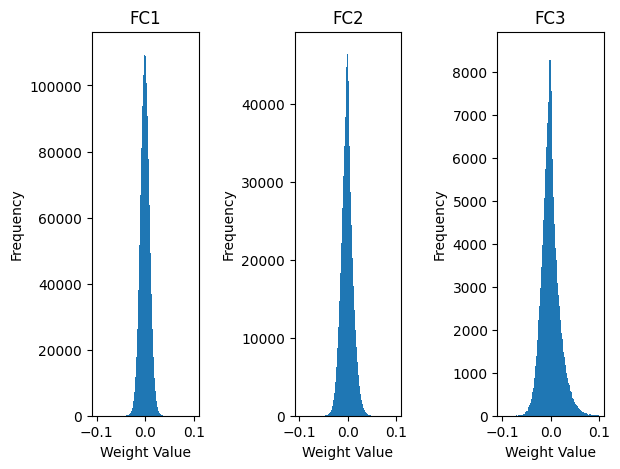

In [ ]:
# Assuming fc1_weights is already defined as in your previous code
plt.subplot(1, 3, 1)
plt.hist(fc1_weights.flatten(), bins=3000, range=(-0.10, 0.10))
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.title("FC1")

# Assuming fc2_weights is already defined as in your previous code
plt.subplot(1, 3, 2)
plt.hist(fc2_weights.flatten(), bins=3000, range=(-0.10, 0.10))
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.title("FC2")

# Assuming fc3_weights is already defined as in your previous code
plt.subplot(1, 3, 3)
plt.hist(fc3_weights.flatten(), bins=3000, range=(-0.10, 0.10))
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.title("FC3")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.9,
                    hspace=0.9)

if not os.path.isdir('./output/'):
    os.makedirs('./output')

plt.savefig("./output/alexnet_weights_distribution.jpg")
plt.show()

# Load the CINIC-10 dataset

In [ ]:
!wget https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz
!tar -xzvf CINIC-10.tar.gz

Output streaming troncato alle ultime 5000 righe.
valid/truck/n03896419_1446.png
valid/truck/n03796401_4733.png
valid/truck/n03796401_478.png
valid/truck/n03796401_4815.png
valid/truck/n03796401_4868.png
valid/truck/n03796401_492.png
valid/truck/n03796401_5035.png
valid/truck/n03796401_5053.png
valid/truck/n03796401_5071.png
valid/truck/n03796401_5116.png
valid/truck/n03796401_5310.png
valid/truck/n03796401_5323.png
valid/truck/n03796401_5338.png
valid/truck/n03796401_5357.png
valid/truck/n03796401_5376.png
valid/truck/n03796401_538.png
valid/truck/n03796401_5729.png
valid/truck/n03796401_5736.png
valid/truck/n03796401_5843.png
valid/truck/n03796401_6098.png
valid/truck/n03796401_6228.png
valid/truck/n03796401_6402.png
valid/truck/n03796401_6410.png
valid/truck/n03796401_6453.png
valid/truck/n03796401_6503.png
valid/truck/n03796401_6531.png
valid/truck/n03796401_6574.png
valid/truck/n03796401_6727.png
valid/truck/n03796401_6763.png
valid/truck/n03796401_6772.png
valid/truck/n03796401_6

In [ ]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the transformations for the data
transform = transforms.Compose([
    transforms.Resize(256),  # Resize the image to 256x256
    transforms.CenterCrop(224),  # Crop the image to 224x224
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize the image
])


# Load the CINIC-10 dataset
train_dataset = datasets.ImageFolder(root='./train', transform=transform)
test_dataset = datasets.ImageFolder(root='./test', transform=transform)
# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Now you can use train_loader and test_loader to iterate through the dataset
# Example:
for images, labels in train_loader:
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)
    break

Image batch shape: torch.Size([64, 3, 224, 224])
Label batch shape: torch.Size([64])


# Evaluate with the CINIC-10 dataset ang compute average gradient for the edges

In [ ]:
# Initialize a list to store gradients
fc1_avg_gradients = []
fc2_avg_gradients = []
fc3_avg_gradients = []
#gradients = []

# Set the device to cuda if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set the device globally
torch.set_default_device(device)

# Iterate through the first 30 images in the test dataset containing 1407 images

for i, (images, labels) in enumerate(tqdm(test_loader)):
    if i%70 != 0:
      continue

    images.requires_grad_(True) # Enable gradient calculation for the image input

    # Perform the forward pass
    outputs = alexnet(images)

    # Choose a class to calculate the gradient with respect to
    target_class = labels[0]  # Using the actual label

    # Calculate the gradient of the output with respect to the image
    loss = outputs[0, target_class]  # loss is the output score for the target class
    loss.backward()

    fc1_avg_gradients.append(fc1.weight.grad.data.numpy())
    fc2_avg_gradients.append(fc2.weight.grad.data.numpy())
    fc3_avg_gradients.append(fc3.weight.grad.data.numpy())
    # print("Processed image",(i/70)+1,"/30","Target class:",target_class)
    #gradient = images.grad.data.numpy()
    #gradients.append(gradient)

#average_gradient = np.mean(np.array(gradients), axis = 0)
fc1_avg_gradients = np.mean(np.array(fc1_avg_gradients), axis=0)
fc2_avg_gradients = np.mean(np.array(fc2_avg_gradients), axis=0)
fc3_avg_gradients = np.mean(np.array(fc3_avg_gradients), axis=0)

# Example of calculating magnitudes (absolute values) of the gradient
#gardient_magnitude = np.abs(average_gradient)
fc1_gradients_magnitude = np.abs(fc1_avg_gradients)
fc2_gradients_magnitude = np.abs(fc2_avg_gradients)
fc3_gradients_magnitude = np.abs(fc3_avg_gradients)

100%|██████████| 1407/1407 [06:05<00:00,  3.85it/s]


In [ ]:
print(fc1_gradients_magnitude.shape)
print("Mean1 "+ str(np.mean(fc1_gradients_magnitude)))
print("Var1 " + str(np.var(fc1_gradients_magnitude)))
print("Max1 " + str(np.max(fc1_gradients_magnitude)) + " Min1 " + str(np.min(fc1_gradients_magnitude)))
print("")

print(fc2_gradients_magnitude.shape)
print("Mean2 "+ str(np.mean(fc2_gradients_magnitude)))
print("Var2 " + str(np.var(fc2_gradients_magnitude)))
print("Max2 " + str(np.max(fc2_gradients_magnitude)) + " Min2 " + str(np.min(np.abs(fc2_gradients_magnitude))))
print("")

print(fc3_gradients_magnitude.shape)
print("Mean3 "+ str(np.mean(fc3_gradients_magnitude)))
print("Var3 " + str(np.var(fc3_gradients_magnitude)))
print("Max3 " + str(np.max(fc3_gradients_magnitude)) + " Min3 " + str(np.min(fc3_gradients_magnitude)))

(4096, 9216)
Mean1 0.014443823
Var1 0.0014899905
Max1 1.7801299 Min1 0.0

(4096, 4096)
Mean2 0.024464069
Var2 0.005001426
Max2 3.3856235 Min2 0.0

(1000, 4096)
Mean3 0.0060492125
Var3 0.03320499
Max3 38.290386 Min3 0.0


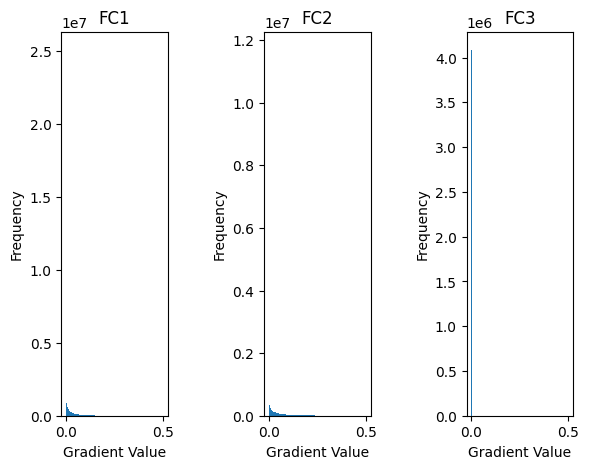

In [ ]:
# Assuming fc1_gradients_magnitude is already defined as in your previous code
plt.subplot(1, 3, 1)
plt.hist(fc1_gradients_magnitude.flatten(), bins=300, range=(0, 0.50))
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.title("FC1")

# Assuming fc2_gradients_magnitude is already defined as in your previous code
plt.subplot(1, 3, 2)
plt.hist(fc2_gradients_magnitude.flatten(), bins=200, range=(0, 0.50))
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.title("FC2")

# Assuming fc1_gradients_magnitude is already defined as in your previous code
plt.subplot(1, 3, 3)
plt.hist(fc3_gradients_magnitude.flatten(), bins=200, range=(0, 0.50))
plt.xlabel("Gradient Value")
plt.ylabel("Frequency")
plt.title("FC3")

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.9,
                    hspace=0.9)

if not os.path.isdir('./output/'):
    os.makedirs('./output')

plt.savefig("./output/alexnet_gradient_distribution.jpg")
plt.show()

In [ ]:
gradient_distributions = [np.mean(fc1_gradients_magnitude),np.std(fc1_gradients_magnitude),np.mean(fc2_gradients_magnitude),np.std(fc2_gradients_magnitude),np.mean(fc3_gradients_magnitude),np.std(fc3_gradients_magnitude)]
print(gradient_distributions)

if not os.path.isdir('./output/'):
    os.makedirs('./output')

np.save("./output/alexnet_gradient_distribution.npy", gradient_distributions)

[0.014443823, 0.038600396, 0.024464069, 0.07072076, 0.0060492125, 0.18222237]


# Building the graph for the last three fully connected layers of pretrained alexnet

## Build the nodes

In [ ]:
!pip install networkit
import networkit as nk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 87.2 MB/s eta 0:00:00


In [ ]:
# prompt: create a graph with a number of nodes equal to the number of neurons of the last three fully connected layers of alexnet using the library netowrkit

# Assuming fc1, fc2, and fc3 are defined as in your previous code
# Get the number of neurons in each fully connected layer
num_neurons_input = fc1.in_features
num_neurons_fc1 = fc1.out_features
num_neurons_fc2 = fc2.out_features
num_neurons_fc3 = fc3.out_features

# Create an empty graph
graph = nk.Graph(num_neurons_input + num_neurons_fc1 + num_neurons_fc2 + num_neurons_fc3, weighted=True, directed=True)

## Draw the edges

In [ ]:
# Add edges based on weights (example for fc1)
for i in tqdm(range(num_neurons_input)):
    for j in range(num_neurons_fc1):
        graph.addEdge(i, num_neurons_input + j, fc1_weights[j, i])

100%|██████████| 9216/9216 [00:38<00:00, 236.88it/s]


In [ ]:
for i in tqdm(range(num_neurons_fc1)):
    for j in range(num_neurons_fc2):
        graph.addEdge(num_neurons_input + i, num_neurons_input + num_neurons_fc1 + j, fc2_weights[j,i])

100%|██████████| 4096/4096 [00:24<00:00, 166.57it/s]


In [ ]:
for i in tqdm(range(num_neurons_fc2)):
    for j in range(num_neurons_fc3):
        graph.addEdge(num_neurons_input + num_neurons_fc1 + i, num_neurons_input + num_neurons_fc1+ num_neurons_fc2 + j, fc3_weights[j,i])

100%|██████████| 4096/4096 [00:03<00:00, 1317.84it/s]


In [ ]:
# Now you can use the graph object
print("Nodes",graph.numberOfNodes())
print("Edges",graph.numberOfEdges())

Nodes 18408
Edges 58621952


# Compute Embedding Features

## Estimate Weighted Betweenness for nodes

In [ ]:
# Compute approximation of betweenness centrality
betweenness = nk.centrality.EstimateBetweenness(graph, int(graph.numberOfNodes()*.85), normalized=True, parallel=True)

betweenness.run()
betweenness_scores = betweenness.scores()

# Print or further process the betweenness centrality scores
print("Estimated Betweenness Centrality Scores:", betweenness_scores)

if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/alexnet_estimated_betweenness.npy", betweenness_scores)

## Compute weighted degree of nodes

In [ ]:
degrees = []

for i in tqdm(range(num_neurons_input + num_neurons_fc1 + num_neurons_fc2 + num_neurons_fc3)):
  degrees.append((abs(graph.weightedDegree(i))+abs(graph.weightedDegreeIn(i)))/(graph.degreeIn(i)+graph.degreeOut(i)))

print(degrees)

if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/alexnet_weighted_degree.npy", degrees)

In [ ]:
norm = np.linalg.norm(degrees)
if norm!=0:
  normalized_degrees = degrees/norm

print(normalized_degrees)

if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/alexnet_normalized_degree.npy", normalized_degrees)

## Compute weighted gradient for nodes

In [ ]:
weighted_node_gradients = []

for i in tqdm(range(num_neurons_input)):
    weighted_node_gradients.append(np.sum(np.abs(np.multiply(fc1_gradients_magnitude[:,i],fc1_weights[:,i]))))

for i in tqdm(range(num_neurons_fc1)):
    weighted_node_gradients.append(np.sum(np.abs(np.multiply(fc2_gradients_magnitude[:,i],fc2_weights[:,i]))))

for i in tqdm(range(num_neurons_fc2)):
    weighted_node_gradients.append(np.sum(np.abs(np.multiply(fc3_gradients_magnitude[:,i],fc3_weights[:,i]))))

for i in tqdm(range(num_neurons_fc3)):
    weighted_node_gradients.append(0.0)

print(weighted_node_gradients)

if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/alexnet_weighted_gradient.npy", weighted_node_gradients)

In [ ]:
norm = np.linalg.norm(weighted_node_gradients)
if norm!=0:
  nomralized_weighted_node_gradients = weighted_node_gradients/norm

print(nomralized_weighted_node_gradients)

if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/alexnet_normalized_gradient.npy", nomralized_weighted_node_gradients)

## Add embedding features to the graph

In [ ]:
node_betweenness = graph.attachNodeAttribute("betweenness", float)
node_degree = graph.attachNodeAttribute("degree", float)
node_gradient = graph.attachNodeAttribute("gradient", float)

In [ ]:
for i in tqdm(range(num_neurons_input + num_neurons_fc1 + num_neurons_fc2 + num_neurons_fc3)):
    node_betweenness[i]=betweenness_scores[i]
    node_degree[i]=normalized_degrees[i]
    node_gradient[i]=nomralized_weighted_node_gradients[i]

## Save complete network to file

In [ ]:
if not os.path.isdir('./output/'):
    os.makedirs('./output')

nk.writeGraph(graph,"./output/alexnet_FC_directed.nkbg003", nk.Format.NetworkitBinary, chunks=16, NetworkitBinaryWeights=2)

In [ ]:
# prompt: free al heavy variables used in previous code

import gc

# Force garbage collection
gc.collect()

# Forcibly release memory
del train_dataset
del test_dataset
del train_loader
del test_loader
del betweenness
del graph

gc.collect()

# If using torch, try to clear the GPU cache
if torch.cuda.is_available():
  torch.cuda.empty_cache()

# **Building graphs for paths computation**

 ## Building network with absolute value of weights for shortest path computation

In [ ]:
abs_graph = nk.Graph(num_neurons_input + num_neurons_fc1 + num_neurons_fc2 + num_neurons_fc3, weighted=True, directed=True)

# FC1
for i in tqdm(range(num_neurons_input)):
    for j in range(num_neurons_fc1):
        abs_graph.addEdge(i, num_neurons_input + j, abs(fc1_weights[j, i]))

# FC2
for i in tqdm(range(num_neurons_fc1)):
    for j in range(num_neurons_fc2):
        abs_graph.addEdge(num_neurons_input + i, num_neurons_input + num_neurons_fc1 + j, abs(fc2_weights[j,i]))

# FC3
for i in tqdm(range(num_neurons_fc2)):
    for j in range(num_neurons_fc3):
        abs_graph.addEdge(num_neurons_input + num_neurons_fc1 + i, num_neurons_input + num_neurons_fc1+ num_neurons_fc2 + j, abs(fc3_weights[j,i]))

## Shortest Paths computation

In [ ]:
shortest_paths_distances = []   # Store distances separately
shortest_paths_nodes = []       # Store paths (nodes) separately

heuristic = [0 for _ in range(abs_graph.upperNodeIdBound())]

for i in tqdm(range(0,num_neurons_input)):
    # print("searching for node",i)
    min_distance = float('inf')
    min_path = []
    dijkstra = nk.distance.Dijkstra(abs_graph, source=i, storePaths=True)
    dijkstra.run()

    for j in range(num_neurons_input + num_neurons_fc1 + num_neurons_fc2, num_neurons_input + num_neurons_fc1+ num_neurons_fc2 + num_neurons_fc3):
        # print("To node",j)
        if (dijkstra.distance(j)<min_distance):
            min_distance = dijkstra.distance(j)
            min_path = dijkstra.getPath(j)

    # print("[",min_distance,",",min_path,"]")
    shortest_paths_distances.append(min_distance)
    shortest_paths_nodes.append(min_path)

if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/alexnet_shortest_paths_distances.npy", shortest_paths_distances)
np.save("./output/alexnet_shortest_paths_nodes.npy", shortest_paths_nodes)

In [ ]:
del(abs_graph)
del(shortest_paths_distances)
del(shortest_paths_nodes)
del(dijkstra)

## Inverting weights to find longest paths

In [ ]:
abs_graph = nk.Graph(num_neurons_input + num_neurons_fc1 + num_neurons_fc2 + num_neurons_fc3, weighted=True, directed=True)

# FC1
for i in tqdm(range(num_neurons_input)):
    for j in range(num_neurons_fc1):
        abs_graph.addEdge(i, num_neurons_input + j, -abs(fc1_weights[j, i]))

# FC2
for i in tqdm(range(num_neurons_fc1)):
    for j in range(num_neurons_fc2):
        abs_graph.addEdge(num_neurons_input + i, num_neurons_input + num_neurons_fc1 + j, -abs(fc2_weights[j,i]))

# FC3
for i in tqdm(range(num_neurons_fc2)):
    for j in range(num_neurons_fc3):
        abs_graph.addEdge(num_neurons_input + num_neurons_fc1 + i, num_neurons_input + num_neurons_fc1+ num_neurons_fc2 + j, -abs(fc3_weights[j,i]))

## Finding longest_paths

In [ ]:
longest_paths_distances = []   # Store distances separately
longest_paths_nodes = []       # Store paths (nodes) separately

heuristic = [0 for _ in range(abs_graph.upperNodeIdBound())]

for i in tqdm(range(0,num_neurons_input)):
    # print("searching for node",i)
    min_distance = float('-inf')
    min_path = []
    dijkstra = nk.distance.Dijkstra(abs_graph, source=i, storePaths=True)
    dijkstra.run()

    for j in range(num_neurons_input + num_neurons_fc1+ num_neurons_fc2, num_neurons_input + num_neurons_fc1+ num_neurons_fc2 + num_neurons_fc3):
        # print("To node",j)
        if (dijkstra.distance(j)>min_distance):
            min_distance = dijkstra.distance(j)
            min_path = dijkstra.getPath(j)

    # print("[",-min_distance,",",min_path,"]")
    longest_paths_distances.append(-min_distance)
    longest_paths_nodes.append(min_path)

if not os.path.isdir('./output/'):
    os.makedirs('./output')
np.save("./output/alexnet_longest_paths_distances.npy", longest_paths_distances)
np.save("./output/alexnet_longest_paths_nodes.npy", longest_paths_nodes)

In [ ]:
del(abs_graph)
del(longest_paths_distances)
del(longest_paths_nodes)
del(dijkstra)

# Compress Output Folder

In [ ]:
!zip -r /content/AlexNet_Results.zip /content/output